In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coronavirus-genome-sequence/MN908947.fna
/kaggle/input/coronavirus-genome-sequence/A_new_coronavirus_associated_with_human_respirator.pdf
/kaggle/input/coronavirus-genome-sequence/MN908947.txt
/kaggle/input/covid19-genbank-file/sequence.gb.txt


In this notebook I will primarily be dealing with the transcription, translation and prediction of genome/dna sequences during the covid-19 pandemic. 

importing the genome sequence for protein transcription and translation into RNA and proteins respectively

In [2]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
covid19 = SeqIO.read('/kaggle/input/coronavirus-genome-sequence/MN908947.fna', "fasta")

finding the total count of the covid19 genome sequence

In [3]:
sequence_count = len(covid19)
print("Total count of the sequence: ", sequence_count)

Total count of the sequence:  29903


to perform some basic operations on the DNA segment of the covid 19 genome, let us extract the first 50 characters of the sequence

In [4]:
covid19_DNA=covid19.seq
covid_DNA=covid19_DNA[:50]
print(covid_DNA) #print the final DNA segment

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC


The DNA sequence here primarily consists of 4 bases: Alanines, Glycines, Cysteines and Threonines. Using this basic sequence, certain operations can be performed

in the below code block we will be implementing the complement and reverse complement of the given DNA sequence

In [5]:
print(covid_DNA + " - Sequence")
print(covid_DNA.complement() + " - Complement")
print(covid_DNA.reverse_complement() + " - Reverse Complement")

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC - Sequence
TAATTTCCAAATATGGAAGGGTCCATTGTTTGGTTGGTTGAAAGCTAGAG - Complement
GAGATCGAAAGTTGGTTGGTTTGTTACCTGGGAAGGTATAAACCTTTAAT - Reverse Complement


To understand the content of the COVID-19 better, lets count the percentage of A,G,C and T in the genome sequence

In [6]:
count_A = covid19_DNA.count('A')
count_G = covid19_DNA.count('G')
count_C = covid19_DNA.count('C')
count_T = covid19_DNA.count('T')

# Calculate the percentages
total_count = len(covid19_DNA)
percentage_A = (count_A / total_count) * 100
percentage_G = (count_G / total_count) * 100
percentage_C = (count_C / total_count) * 100
percentage_T = (count_T / total_count) * 100

# Print the percentages
print("Percentage of A: {:.2f}%".format(percentage_A))
print("Percentage of G: {:.2f}%".format(percentage_G))
print("Percentage of C: {:.2f}%".format(percentage_C))
print("Percentage of T: {:.2f}%".format(percentage_T))

Percentage of A: 29.94%
Percentage of G: 19.61%
Percentage of C: 18.37%
Percentage of T: 32.08%


plotting a bar plot for the total A,G,C,T count

In [7]:
nucleotides={'A':count_A,'G':count_G,'C':count_C,'T':count_T}
print(nucleotides)

{'A': 8954, 'G': 5863, 'C': 5492, 'T': 9594}


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


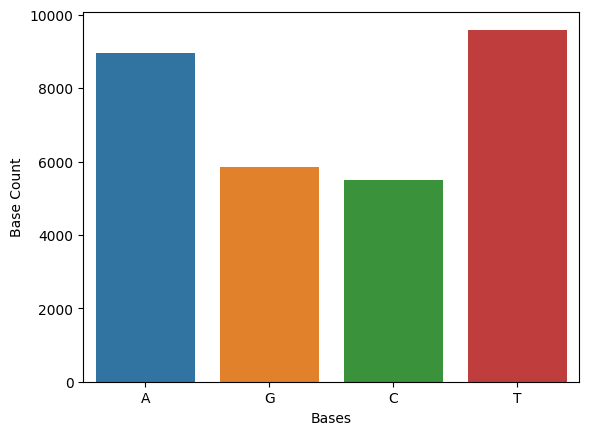

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the nucleotide counts
nucleotides = {'A': count_A, 'G': count_G, 'C': count_C, 'T': count_T}

# Create lists for x-axis labels and y-axis values
bases = list(nucleotides.keys())
base_counts = list(nucleotides.values())

# Create bar plot using Seaborn
sns.barplot(x=bases, y=base_counts)

# Set labels for x-axis and y-axis
plt.xlabel('Bases')
plt.ylabel('Base Count')

# Display the plot
plt.show()

Hence we have been able to find the counts of all the bases in the given genome sequence

The GC content of a genome sequence refers to the percentage of nucleotides that are either guanine (G) or cytosine (C) in relation to the total number of nucleotides in the sequence. It is a measure of the relative abundance of these nucleotides in the DNA molecule.

GC content is important because it can influence the stability and properties of the DNA molecule. The stability of DNA can have implications for various biological processes such as DNA replication, transcription, and protein binding. Additionally, differences in GC content can be associated with variations in gene expression, evolutionary patterns, and genome structure among different organisms.Now, finding the GC% using predefined modules in BioPython, we get:

In [9]:
from Bio.SeqUtils import GC
print("GC% is equal to: " +str(GC(covid19_DNA)))

GC% is equal to: 37.97277865097148


/opt/conda/lib/python3.10/site-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(
